In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone


In [2]:
dataset = pd.read_csv('HomeC-meter1_2015.csv')

In [3]:
dataset.head()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
0,2015-01-01 00:00:00,1.167223,0.0,1.167223,0.000236,0.229379,0.331326,0.018590,0.067467,0.004420,0.009904,0.000437,0.000060,0.000007,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 00:30:00,1.171444,0.0,1.171444,0.000225,0.228758,0.300048,0.018604,0.108881,0.004456,0.010001,0.000347,0.000087,0.000007,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,1.151474,0.0,1.151474,0.000229,0.229446,0.323099,0.018620,0.005851,0.004449,0.009916,0.000612,0.000031,0.000007,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 01:30:00,1.398982,0.0,1.398982,0.000209,0.277066,0.314399,0.018593,0.005925,0.004457,0.009872,0.000693,0.000004,0.000007,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 02:00:00,1.080775,0.0,1.080775,0.000239,0.228736,0.308560,0.018638,0.062217,0.004478,0.010046,0.000497,0.000032,0.000006,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset.tail()

,Date & Time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
39759,2015-12-31 23:55:00,1.136050,0.003467,1.136050,0.000017,0.021117,0.224267,0.441600,0.126483,0.007083,0.013217,0.000417,0.000100,0.000000,0.031483,0.001050,0.004050,0.001517,0.003467
39760,2015-12-31 23:56:00,0.949633,0.003483,0.949633,0.000033,0.020817,0.063117,0.444967,0.126000,0.006967,0.013117,0.000417,0.000167,0.000017,0.031417,0.001000,0.004050,0.001550,0.003483
39761,2015-12-31 23:57:00,0.944700,0.003467,0.944700,0.000017,0.020783,0.062550,0.445350,0.125467,0.006950,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004050,0.001633,0.003467
39762,2015-12-31 23:58:00,0.945417,0.003483,0.945417,0.000017,0.020783,0.061850,0.450667,0.125050,0.007033,0.013100,0.000417,0.000150,0.000000,0.031467,0.001000,0.004033,0.001583,0.003483
39763,2015-12-31 23:59:00,0.936550,0.003467,0.936550,0.000000,0.020717,0.062800,0.442717,0.124633,0.006950,0.013117,0.000433,0.000133,0.000000,0.031533,0.001000,0.004050,0.001633,0.003467


In [5]:
dataset.columns

Index(['Date & Time', 'use [kW]', 'gen [kW]', 'House overall [kW]',
       'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]',
       'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]',
       'Garage door [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]',
       'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
       'Living room [kW]', 'Solar [kW]'],
      dtype='object')

In [6]:
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar'],
      dtype='object')

In [7]:
dataset.describe()

,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar
count,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000,39764.000000
mean,0.893137,0.045883,0.893137,0.038868,0.118660,0.154126,0.082780,0.056743,0.025174,0.013910,0.001548,0.009786,0.000008,0.075229,0.015604,0.011691,0.039420,0.045883
std,0.737002,0.099776,0.737002,0.199305,0.170315,0.180630,0.096339,0.065954,0.042349,0.009516,0.019522,0.075930,0.000009,0.236358,0.117577,0.094075,0.095368,0.099776
min,0.000133,0.000000,0.000133,0.000000,0.000067,0.000217,0.000133,0.000017,0.000000,0.000033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431470,0.003000,0.431470,0.000006,0.020250,0.063540,0.040210,0.005117,0.004484,0.012570,0.000500,0.000029,0.000000,0.029583,0.000997,0.004000,0.001454,0.003000
50%,0.708066,0.003367,0.708066,0.000030,0.020700,0.065864,0.042333,0.017279,0.007333,0.012900,0.000667,0.000067,0.000004,0.031500,0.001000,0.004003,0.001567,0.003367
75%,1.132841,0.019825,1.132841,0.000217,0.153071,0.126712,0.080521,0.119886,0.008267,0.013083,0.000733,0.000217,0.000017,0.038300,0.001017,0.004167,0.001667,0.019825
max,9.890377,1.043312,9.890377,1.370083,1.843700,0.769954,0.870517,0.631167,1.226867,0.275139,0.878183,1.607650,0.000067,6.279317,1.615567,1.873533,0.372333,1.043312


In [8]:
dataset.shape

(39764, 19)

In [9]:
#Checking null values
dataset.isnull().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       0
Kitchen 38       0
Barn             0
Well             0
Microwave        0
Living room      0
Solar            0
dtype: int64

In [10]:
dataset.isna().sum()

Date & Time      0
use              0
gen              0
House overall    0
Dishwasher       0
Furnace 1        0
Furnace 2        0
Home office      0
Fridge           0
Wine cellar      0
Garage door      0
Kitchen 12       0
Kitchen 14       0
Kitchen 38       0
Barn             0
Well             0
Microwave        0
Living room      0
Solar            0
dtype: int64

In [11]:
# Check if there are entries with null values
display(dataset.info())
dataset[dataset.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39764 entries, 0 to 39763
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date & Time    39764 non-null  object 
 1   use            39764 non-null  float64
 2   gen            39764 non-null  float64
 3   House overall  39764 non-null  float64
 4   Dishwasher     39764 non-null  float64
 5   Furnace 1      39764 non-null  float64
 6   Furnace 2      39764 non-null  float64
 7   Home office    39764 non-null  float64
 8   Fridge         39764 non-null  float64
 9   Wine cellar    39764 non-null  float64
 10  Garage door    39764 non-null  float64
 11  Kitchen 12     39764 non-null  float64
 12  Kitchen 14     39764 non-null  float64
 13  Kitchen 38     39764 non-null  float64
 14  Barn           39764 non-null  float64
 15  Well           39764 non-null  float64
 16  Microwave      39764 non-null  float64
 17  Living room    39764 non-null  float64
 18  Solar 

None

,Date & Time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,Garage door,Kitchen 12,Kitchen 14,Kitchen 38,Barn,Well,Microwave,Living room,Solar


In [12]:
dataset['Date & Time'].head()

0    2015-01-01 00:00:00
1    2015-01-01 00:30:00
2    2015-01-01 01:00:00
3    2015-01-01 01:30:00
4    2015-01-01 02:00:00
Name: Date & Time, dtype: object

In [13]:
dataset.shape

(39764, 19)

<AxesSubplot:>

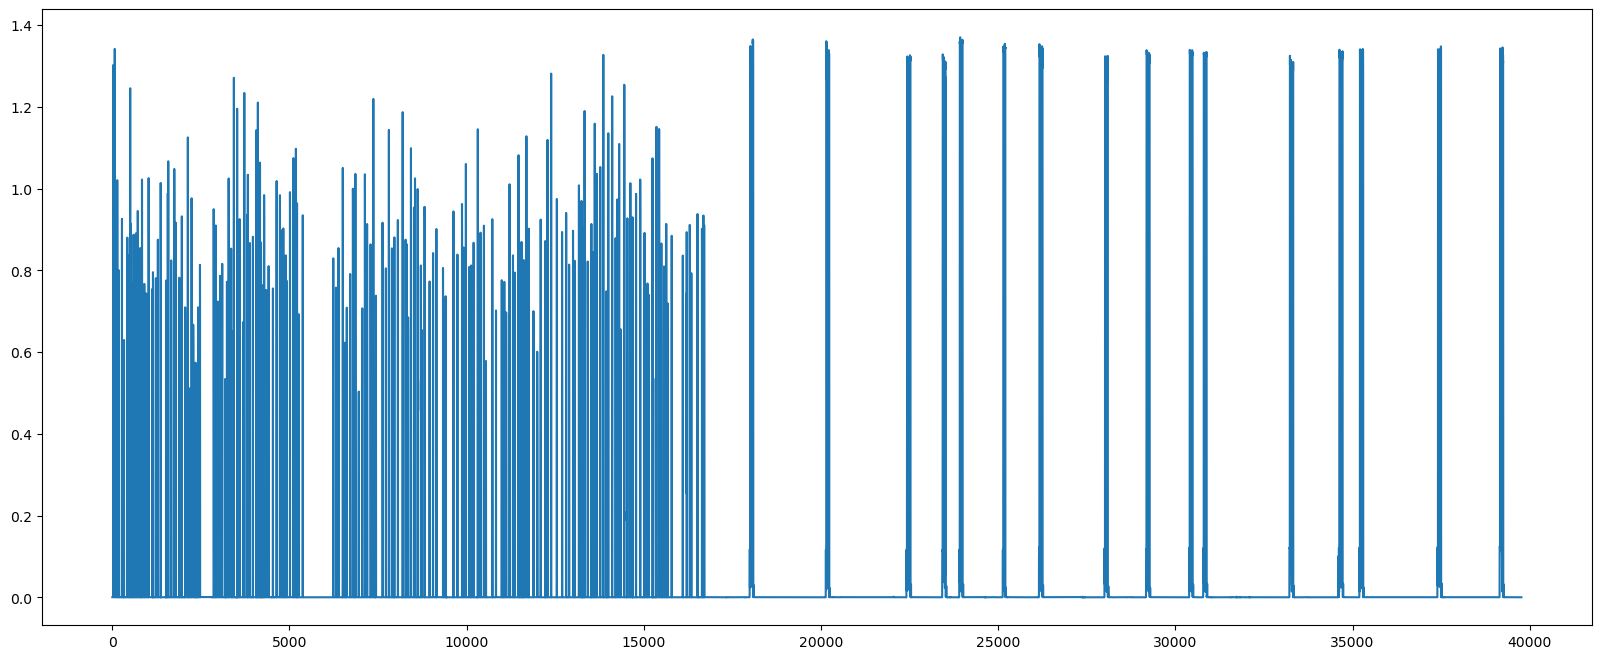

In [14]:
dataset['Dishwasher'].plot(figsize=(20,8))

In [15]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['sum_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)

In [16]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.columns

Index(['Date & Time', 'use', 'gen', 'House overall', 'Dishwasher',
       'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well',
       'Microwave', 'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [17]:
dataset.shape

(39764, 16)

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

In [19]:
# Convert the 'Datetime' column to a datetime object and set it as the index
dataset['Date & Time'] = pd.to_datetime(dataset['Date & Time'])
dataset.set_index(['Date & Time'], inplace=True)


KeyError: 'Use'

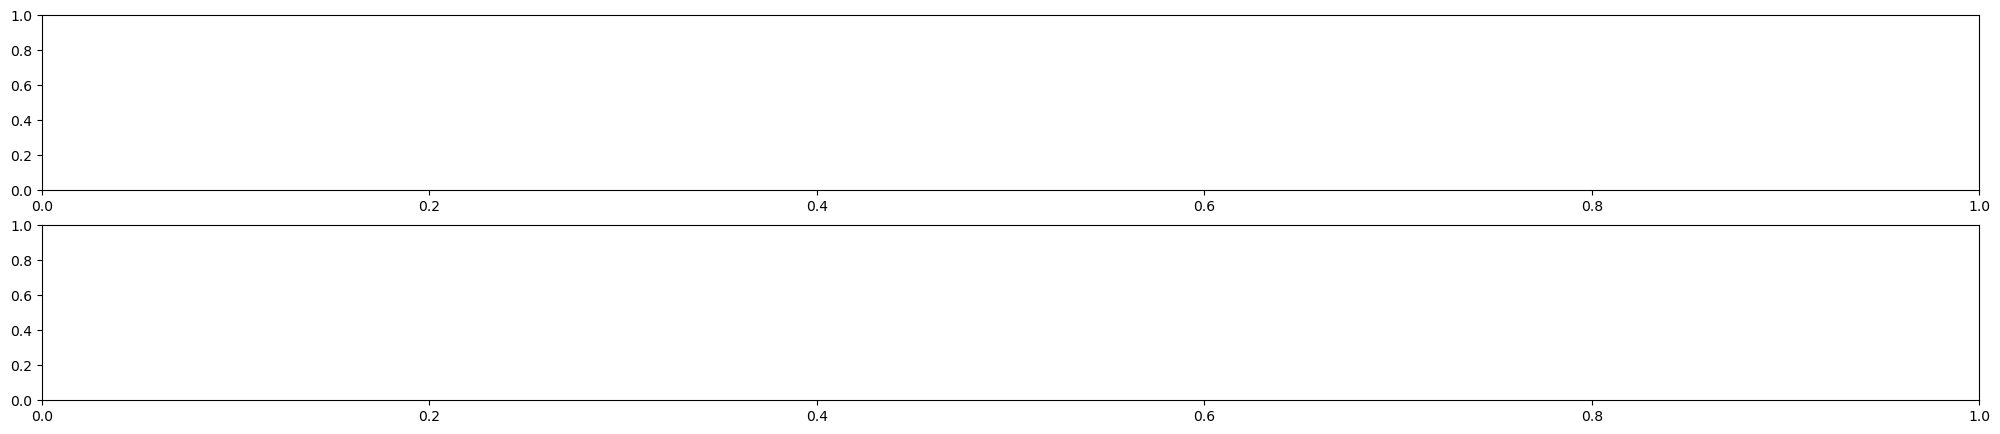

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['Use'].resample('D').mean().plot(ax=axes[0])
dataset['Gen'].resample('D').mean().plot(ax=axes[1])

In [21]:
dataset['Barn'].value_counts()

0.000000    3724
0.031283     178
0.031317     177
0.031017     169
0.031050     168
            ... 
0.031584       1
0.031934       1
0.032023       1
0.031804       1
0.155067       1
Name: Barn, Length: 15404, dtype: int64

<AxesSubplot:xlabel='Date & Time'>

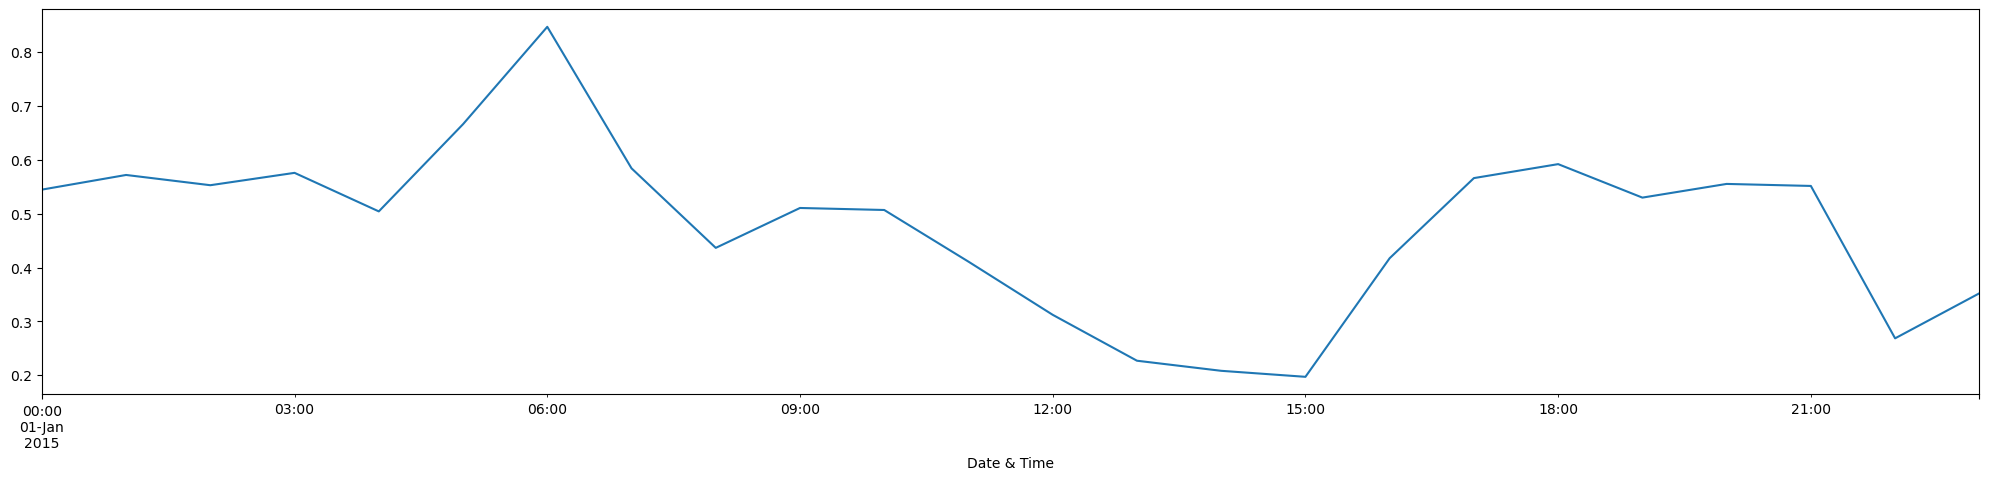

In [22]:
dataset['sum_Furnace'].resample("h").mean().iloc[:24].plot()

In [23]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [24]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [26]:
dataset.columns


Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'],
      dtype='object')

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [31]:
for name, column in dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']].iteritems():
    Augmented_Dickey_Fuller_Test_func(dataset[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: use
Test Statistic                -1.285377e+01
p-value                        5.284773e-24
No Lags Used                   5.400000e+01
Number of Observations Used    3.970900e+04
Critical Value (1%)           -3.430515e+00
Critical Value (5%)           -2.861613e+00
Critical Value (10%)          -2.566809e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: gen
Test Statistic                -7.947922e+00
p-value                        3.182905e-12
No Lags Used                   5.400000e+01
Number of Observations Used    3.970900e+04
Critical Value (1%)           -3.430515e+00
Critical Value (5%)           -2.861613e+00
Critical Value (10%)          -2.566809e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: House overall
Test Statistic                -1.285377e+01
p-value                        5

In [36]:
X = dataset[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen' ]]
train, test = X[0:-30], X[-30:]

In [37]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [38]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [40]:


cointegration_test(train_diff[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen']])



LinAlgError: Matrix is not positive definite

In [41]:


from pmdarima import auto_arima



In [ ]:
pdq = []
for name, column in train_diff[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'sum_Furnace', 'sum_Kitchen'  ]].iteritems():
    print(f'Searching order of p ,d& q for : {name}')
    size = int(len(data_daily)*0.7)


arima_model = auto_arima(train, start_p=0, d=0, start_q=0, max_p=5, max_d=5, max_q=5,
                        start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,  m=12, #if m=1 seasonal is set to False
                        seasonal=True, error_action='warn', trace=True, suppress_warnings=True,
                        stepwise=True, random_state=20, n_fits=50)
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))